#### Data Loading

In [ ]:
#Loading the heart-disease.csv dataset
import pandas as pd

df = pd.read_csv('heart-disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Independent and dependent variables
X = df.drop('target',axis='columns')
Y = df['target']

#### Problem 1

**a)** Plotting boxplots of models' accuracy


In [ ]:
#applying 5fold cross-validation to the dataset
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
skf.get_n_splits(X,Y)

5

{'KNN': array([0.62295082, 0.57377049, 0.67213115, 0.7       , 0.7       ]), 'NB': array([0.8852459 , 0.80327869, 0.80327869, 0.85      , 0.83333333])}


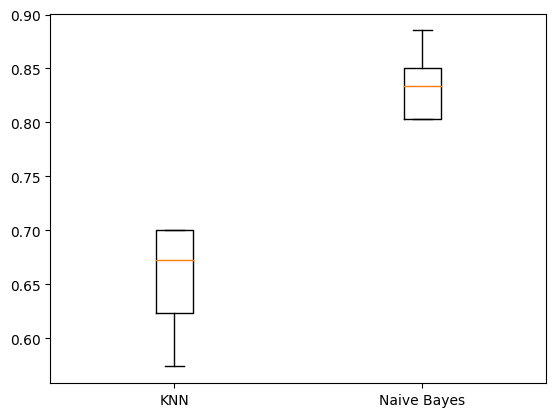

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(5)
nb = GaussianNB()

acc = {"KNN":np.zeros(5), "NB":np.zeros(5)}
for i,(train_index, test_index) in enumerate(skf.split(X, Y)):
    x_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]

    knn.fit(x_train, y_train)
    nb.fit(x_train, y_train)

    y_pred_knn = knn.predict(X.iloc[test_index])
    acc["KNN"][i] = accuracy_score(Y.iloc[test_index],y_pred_knn)

    y_pred_nb = nb.predict(X.iloc[test_index])
    acc["NB"][i] = accuracy_score(Y.iloc[test_index],y_pred_nb)

print(acc)
plt.boxplot(acc.values(), labels=["KNN","Naive Bayes"])
plt.show()


**b)** Scaling dataset before training


In [ ]:
#Apply scaling to dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df))
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


{'KNN': array([0.83606557, 0.80327869, 0.85245902, 0.83333333, 0.78333333]), 'NB': array([0.8852459 , 0.80327869, 0.80327869, 0.85      , 0.83333333])}


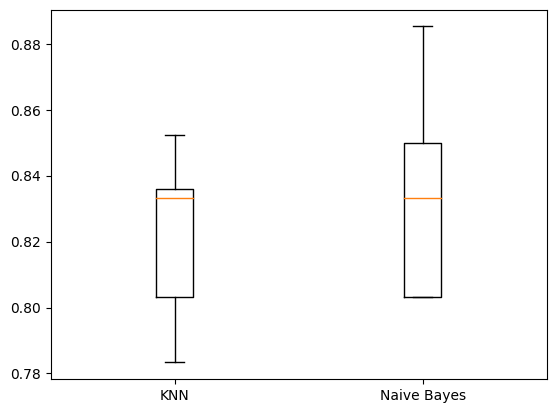

In [ ]:

X = scaled_df.drop(13,axis='columns')
Y = scaled_df[13]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
skf.get_n_splits(X,Y)


knn = KNeighborsClassifier(5)
nb = GaussianNB()
scaler = MinMaxScaler()
scaler.fit(df)


acc = {"KNN":np.zeros(5), "NB":np.zeros(5)}
for i,(train_index, test_index) in enumerate(skf.split(X, Y)):
    x_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]

    knn.fit(x_train, y_train)
    nb.fit(x_train, y_train)

    y_pred_knn = knn.predict(X.iloc[test_index])
    acc["KNN"][i] = accuracy_score(Y.iloc[test_index],y_pred_knn)

    y_pred_nb = nb.predict(X.iloc[test_index])
    acc["NB"][i] = accuracy_score(Y.iloc[test_index],y_pred_nb)

print(acc)
plt.boxplot(acc.values(), labels=["KNN","Naive Bayes"])
plt.show()


**c)** is the kNN statistically superior?


In [ ]:
#Applying a ttest to determine p-value of the hypothesis
from scipy import stats

t_statistic, p_value = stats.ttest_rel(acc["KNN"], acc["NB"])
print(p_value)

0.5074623897569328


#### Problem 2

80-20 training test split kNN with different k values

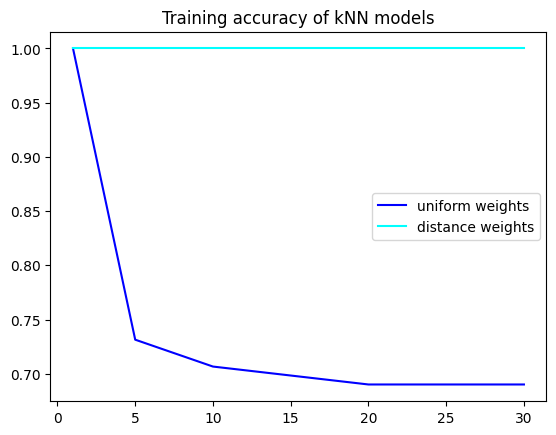

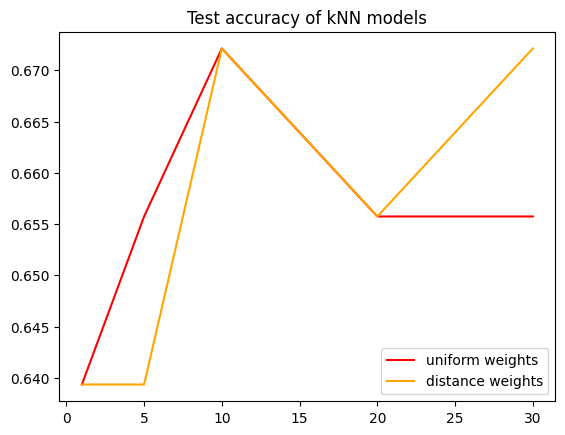

In [ ]:
from sklearn.model_selection import train_test_split

klist = [1,5,10,20,30]

X = df.drop('target',axis='columns')
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=1)

test_acc = [[],[]]
train_acc = [[],[]]
for k in klist:
    model_uni = KNeighborsClassifier(k, weights='uniform')
    model_uni.fit(X_train, y_train)
    train_pred_uni = model_uni.predict(X_train)
    test_pred_uni = model_uni.predict(X_test)

    train_acc[0].append(accuracy_score(y_train, train_pred_uni))
    test_acc[0].append(accuracy_score(y_test, test_pred_uni))


    model_dist = KNeighborsClassifier(k, weights='distance')
    model_dist.fit(X_train, y_train)
    train_pred_dist = model_dist.predict(X_train)
    test_pred_dist = model_dist.predict(X_test)

    train_acc[1].append(accuracy_score(y_train, train_pred_dist))
    test_acc[1].append(accuracy_score(y_test, test_pred_dist))

plt.plot(klist, train_acc[0], label = 'uniform weights', color = 'blue')
plt.plot(klist, train_acc[1], label = 'distance weights', color = 'cyan')
plt.title("Training accuracy of kNN models")
plt.legend()
plt.show()
plt.plot(klist, test_acc[0], label = 'uniform weights', color = 'red')
plt.plot(klist, test_acc[1], label = 'distance weights', color = 'orange')
plt.title("Test accuracy of kNN models")
plt.legend()
plt.show()

